In [9]:
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt

In this notebook I will fit a spike triggered average with neurons responding to sparse nose stimuli. The only difference is that we don't have spikes, but sparse deconvolved calcium imag

In [2]:
mov=np.load('/media/maria/DATA1/Documents/data_for_dayan_notebook/mov.npy')
iframe=np.load('/media/maria/DATA1/Documents/data_for_dayan_notebook/iframe.npy')
spks=np.load('/media/maria/DATA1/Documents/data_for_dayan_notebook/spks.npy')

In [3]:
dt = 1 # time offset between stimulus presentation and response
ivalid = iframe+dt<spks.shape[-1] # remove timepoints outside the valid time range
iframe = iframe[ivalid]
mov = mov[:, :, ivalid]
S = spks[:, iframe+dt]

In [4]:
del spks

In [7]:
NN, NT = S.shape 
X = np.reshape(mov, [-1, NT]) # reshape to Npixels by Ntimepoints
X = X-0.5 # center at 0
#X = np.abs(X-0.5) # center at 0
X = zscore(X, axis=1)/NT**.5  # z-score each pixel separately
npix = X.shape[0]

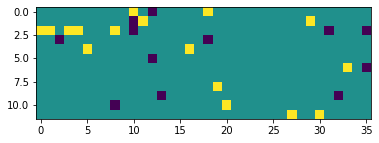

In [10]:
plt.imshow(mov[:,:,0])

(18795, 30560)


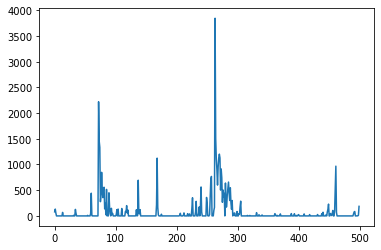

In [12]:
print(S.shape)
plt.plot(S[0,:500])